In [141]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Compose, Normalize
from torchvision.datasets import ImageFolder
import os

To extract the labels for y

In [181]:
LR = 0.001
BATCH_SIZE = 4
EPOCH = 1

In [143]:
transform = Compose(
    [ToTensor(),
     Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [153]:
train_data = ImageFolder('./data/train/', transform=transform)
test_data = ImageFolder('./data/test/', transform=transform)

In [154]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_data, shuffle=True, batch_size=BATCH_SIZE)

torch.Size([4, 3, 48, 48]) tensor(5)


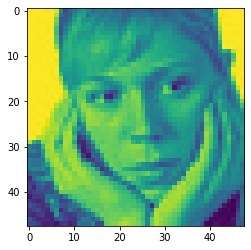

In [155]:
data = iter(train_loader)
x, y = data.next()
# u = torch.reshape(x, (64, 1, 48,48))
ind = 3
print(x.shape, y[ind])
plt.imshow(x[0][0])

In [156]:
test_data[0][0]

tensor([[[-0.6392, -0.7333, -0.7961,  ..., -0.9216, -0.8980, -0.8275],
         [-0.6078, -0.7804, -0.8353,  ..., -0.9137, -0.9216, -0.8353],
         [-0.6078, -0.7882, -0.8824,  ..., -0.8275, -0.8118, -0.8275],
         ...,
         [ 0.6314,  0.4039, -0.1529,  ...,  0.4980,  0.6078,  0.6000],
         [ 0.6627,  0.5529,  0.1686,  ...,  0.4196,  0.5686,  0.6000],
         [ 0.6314,  0.5765,  0.3412,  ...,  0.2941,  0.4118,  0.4824]],

        [[-0.6392, -0.7333, -0.7961,  ..., -0.9216, -0.8980, -0.8275],
         [-0.6078, -0.7804, -0.8353,  ..., -0.9137, -0.9216, -0.8353],
         [-0.6078, -0.7882, -0.8824,  ..., -0.8275, -0.8118, -0.8275],
         ...,
         [ 0.6314,  0.4039, -0.1529,  ...,  0.4980,  0.6078,  0.6000],
         [ 0.6627,  0.5529,  0.1686,  ...,  0.4196,  0.5686,  0.6000],
         [ 0.6314,  0.5765,  0.3412,  ...,  0.2941,  0.4118,  0.4824]],

        [[-0.6392, -0.7333, -0.7961,  ..., -0.9216, -0.8980, -0.8275],
         [-0.6078, -0.7804, -0.8353,  ..., -0

In [157]:
def prepare_labels():
    y_labels = {}
    for index, dirname in enumerate(sorted(os.listdir('./data/train/'))):
        y_labels[index] = dirname
    return y_labels

In [158]:
label_dict = prepare_labels()

In [159]:
label_dict

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [160]:
print(len(x), len(y))

4 4


In [161]:
print(x.shape, y.shape)
print(x.dtype, y.dtype)

torch.Size([4, 3, 48, 48]) torch.Size([4])
torch.float32 torch.int64


In [187]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.layer1 = nn.Sequential(
            nn.Linear(16 * 9 *9, 648),
            nn.ReLU(),
        )
        self.layer2 = nn.Sequential(
            nn.Linear(648, 162),
            nn.ReLU(),
        )
        self.layer3 = nn.Linear(162, 7)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
#         print(x.shape)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [188]:
net = Net()
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(net.parameters(), lr=LR)

In [189]:
def train(dataloader, model, loss_fn, optim):
    size = len(dataloader.dataset)
    model.train()
    for step, (x, y) in enumerate(dataloader):
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optim.zero_grad()
        loss.backward()
        optim.step()

        if step % 100 == 0:
            loss, current = loss.item(), step * len(x)
            print( f'loss {loss:>7f} {current:>5d}/{size:>5d}')


In [190]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for x,y in dataloader:
            y_pred = model(x)
            test_loss += loss_fn(y_pred, y).item()
            correct += (y_pred.argmax(1) == y).type(torch.float).sum().item()
        test_loss /= num_batches
        correct /= size
        print(f'test error \n acc {(100*correct):>0.1f}% avg_loss {test_loss:>8f} \n')

In [191]:
for i in range(EPOCH):
    print(f'EPOCH {i+1}')
    train(train_loader, net, loss_fn, optim)
    test(test_loader, net, loss_fn)

EPOCH 1
loss 1.946563     0/28709
loss 1.933162   400/28709
loss 1.826930   800/28709
loss 1.762393  1200/28709
loss 1.627350  1600/28709
loss 1.858434  2000/28709
loss 1.777452  2400/28709
loss 1.876788  2800/28709
loss 1.594668  3200/28709
loss 1.458749  3600/28709
loss 1.747817  4000/28709
loss 1.553493  4400/28709
loss 2.089065  4800/28709
loss 1.153983  5200/28709
loss 1.689656  5600/28709
loss 1.612949  6000/28709
loss 1.260827  6400/28709
loss 1.617207  6800/28709
loss 1.264511  7200/28709
loss 1.231432  7600/28709
loss 1.152399  8000/28709
loss 1.873051  8400/28709
loss 1.976018  8800/28709
loss 1.527232  9200/28709
loss 1.814644  9600/28709
loss 1.558788 10000/28709
loss 1.408102 10400/28709
loss 1.812941 10800/28709
loss 1.627375 11200/28709
loss 1.283143 11600/28709
loss 1.138951 12000/28709
loss 1.389575 12400/28709
loss 0.914159 12800/28709
loss 0.339693 13200/28709
loss 1.937960 13600/28709
loss 1.358521 14000/28709
loss 1.654983 14400/28709
loss 2.308438 14800/28709
loss

original ->  angry | prediction ->  angry


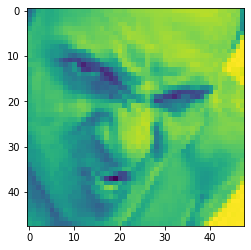

In [197]:
testx, testy= test_data[22]
np_testx = testx[0].numpy()
plt.imshow(np_testx)
test_pred_y = net(testx[None,...])
argmax_pred_y = torch.argmax(test_pred_y)
print('original -> ',label_dict[testy], '| prediction -> ',label_dict[argmax_pred_y.item()])